<a href="https://colab.research.google.com/github/sainathnallagonda/Electric-Vehicle-Charging-Analysis/blob/main/Electric_Vehicle_Charging_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electric Vehicle Charging Patterns Analysis: Optimizing Infrastructure for the EV Revolution

##Executive Summary
- This analysis examines electric vehicle charging patterns across different user types, locations, and vehicle models to identify key trends and optimization opportunities for charging infrastructure. The dataset contains 1,320 EV charging sessions with detailed information on user behavior, vehicle specifications, charging session details, and environmental factors.

- Key findings reveal distinct charging behaviors among commuters, long-distance travelers, and casual drivers, with notable variations in energy consumption, charging duration, and cost across different charger types and locations. DC Fast Chargers deliver significantly higher charging rates but at premium costs, while Level 2 chargers offer a balanced approach for regular users. Peak charging activity occurs during morning (7-9 AM) and evening (5-8 PM) hours, with weekend sessions typically being longer and consuming more energy than weekday sessions.

- Statistical analysis identified significant differences in energy consumption across charger types and charging costs across vehicle models. These insights can inform strategic decisions for EV charging network expansion, pricing optimization, and user experience improvement as electric vehicle adoption continues to accelerate.

##Problem Statement
As electric vehicle adoption accelerates globally, charging infrastructure planning becomes increasingly critical. This analysis addresses several key challenges:

- **Infrastructure Planning**: How can we optimize the placement and type of charging stations based on user behavior?
- **User Experience**: What patterns exist in charging behaviors across different user segments?
- **Economic Efficiency**: How do charging costs vary across charger types, locations, and vehicle models?
- **Capacity Planning**: What are the peak charging times and how can we manage demand?

Understanding these patterns is essential for utilities, city planners, charging network operators, and automobile manufacturers to support the growing EV ecosystem while ensuring positive user experiences.

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [199]:
df = pd.read_csv('/content/ev_charging_patterns.csv')

In [200]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [201]:
df.shape

(1320, 20)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [203]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [204]:
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


Handling missing values

In [205]:
# Impute Energy Consumed with median by Charger Type and Vehicle Model
df['Energy Consumed (kWh)'] = df.groupby(['Charger Type', 'Vehicle Model'])['Energy Consumed (kWh)'].transform(lambda x: x.fillna(x.median()))

# Impute Charging Rate where possible
df['Charging Rate (kW)'] = df.apply(lambda row: row['Energy Consumed (kWh)'] / row['Charging Duration (hours)'] if pd.isna(row['Charging Rate (kW)']) else row['Charging Rate (kW)'], axis=1)

# Impute Distance Driven with median
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].median())


In [206]:
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),0
Charging Duration (hours),0
Charging Rate (kW),0


Handling outliers

In [207]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

In [208]:
for col in ['Energy Consumed (kWh)', 'Charging Duration (hours)', 'State of Charge (Start %)', 'State of Charge (End %)']:
    print(f"Outliers in {col}:\n", detect_outliers(df, col))

Outliers in Energy Consumed (kWh):
 170    127.757474
914    152.238758
Name: Energy Consumed (kWh), dtype: float64
Outliers in Charging Duration (hours):
 387     6.176417
624     6.494007
772     6.759152
848     5.945571
924     6.773095
1032    7.635145
Name: Charging Duration (hours), dtype: float64
Outliers in State of Charge (Start %):
 191    152.489761
Name: State of Charge (Start %), dtype: float64
Outliers in State of Charge (End %):
 44      132.952011
110      10.080074
287     177.708666
374      18.700349
439      14.989946
488      18.839876
661      22.275216
674     133.629435
746       7.604224
775     159.988903
833      15.717975
858      19.571800
903     140.383048
930     146.847644
1031     21.880221
1070    150.788107
1183    139.897408
1201    146.759451
1230    147.492130
Name: State of Charge (End %), dtype: float64


In [209]:
# Cap State of Charge
df['State of Charge (Start %)'] = df['State of Charge (Start %)'].clip(0, 100)
df['State of Charge (End %)'] = df['State of Charge (End %)'].clip(0, 100)

# Cap Energy Consumed at Battery Capacity
df['Energy Consumed (kWh)'] = df[['Energy Consumed (kWh)', 'Battery Capacity (kWh)']].min(axis=1)

# Cap Temperature
df['Temperature (°C)'] = df['Temperature (°C)'].clip(-20, 45)

# Cap Charging Duration based on Charger Type
df.loc[df['Charger Type'] == 'DC Fast Charger', 'Charging Duration (hours)'] = df.loc[df['Charger Type'] == 'DC Fast Charger', 'Charging Duration (hours)'].clip(upper=2)

In [210]:
print(df['Charger Type'].value_counts())


Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64


In [211]:
print(df['User Type'].value_counts())


User Type
Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: count, dtype: int64


In [212]:
print(df['Charging Station Location'].value_counts())

Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64


##Exploratory Data Analysis:



**Data Visualazation**

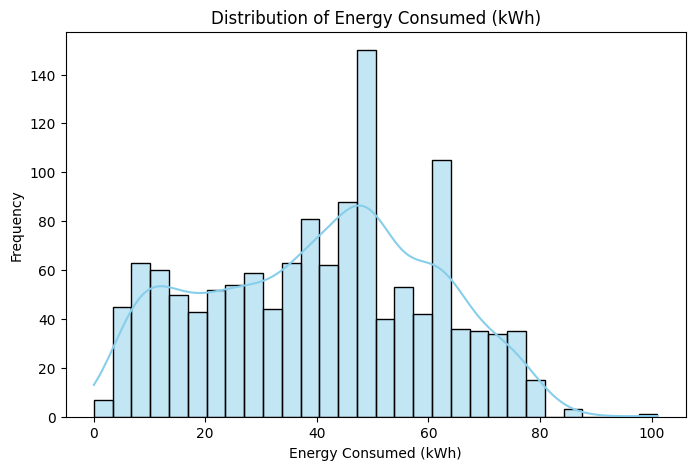

In [213]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Energy Consumed (kWh)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.show()


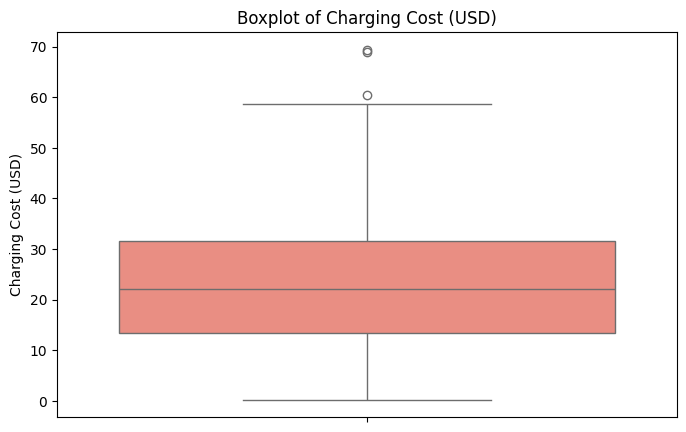

In [214]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Charging Cost (USD)'], color='salmon')
plt.title('Boxplot of Charging Cost (USD)')
plt.ylabel('Charging Cost (USD)')
plt.show()

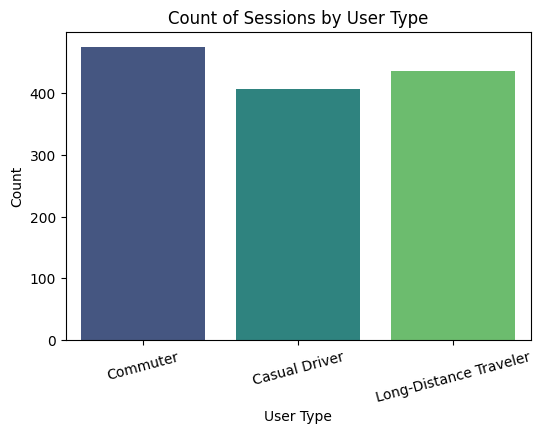

In [215]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='User Type', palette='viridis')
plt.title('Count of Sessions by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

Bivariate Analysis

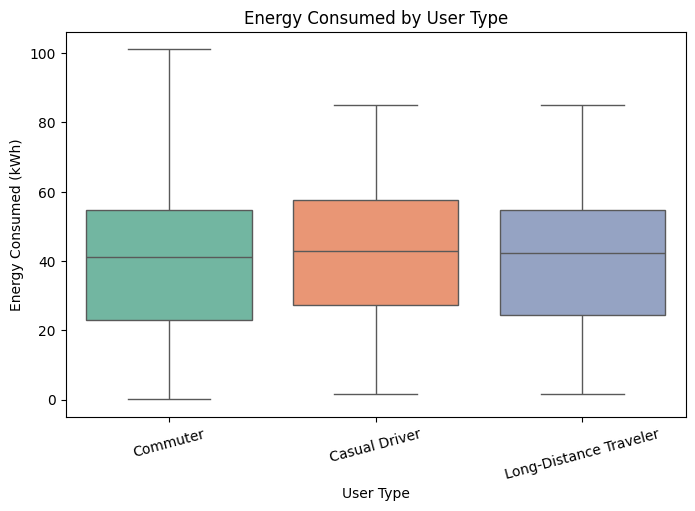

In [216]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='User Type', y='Energy Consumed (kWh)', palette='Set2')
plt.title('Energy Consumed by User Type')
plt.xlabel('User Type')
plt.ylabel('Energy Consumed (kWh)')
plt.xticks(rotation=15)
plt.show()


<Figure size 1600x800 with 0 Axes>

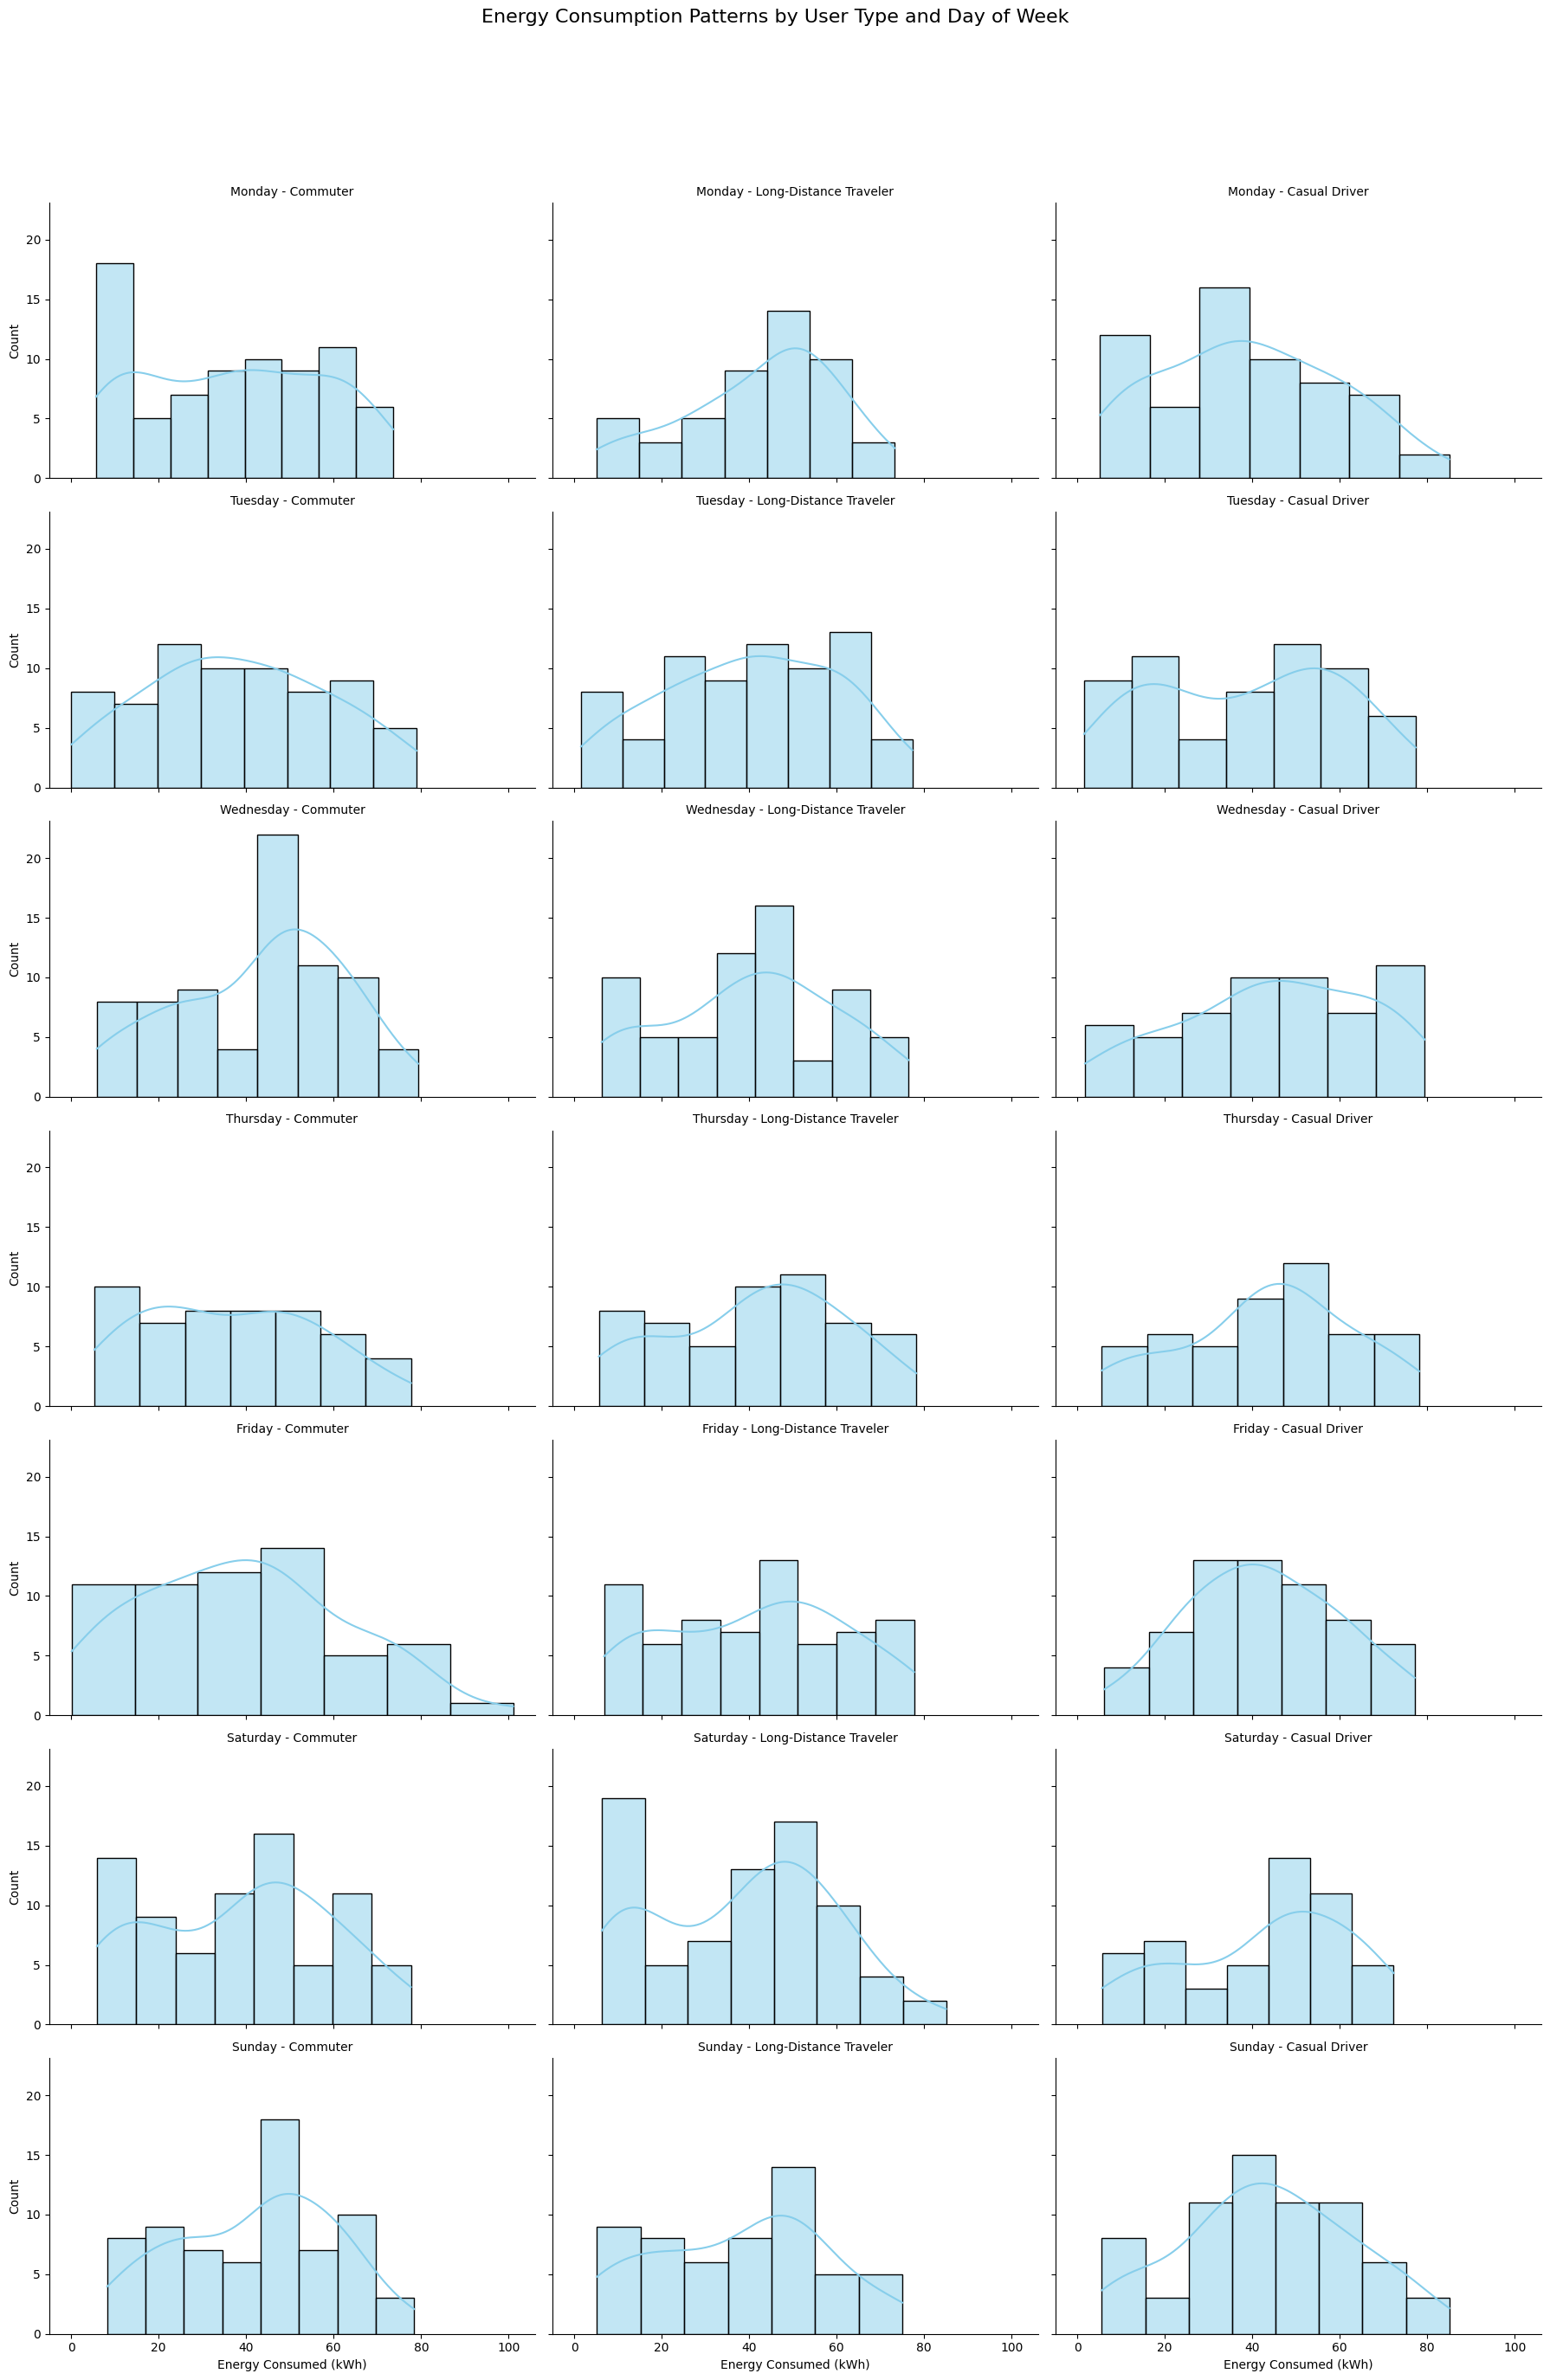

In [217]:
plt.figure(figsize=(16, 8))
g = sns.FacetGrid(df, col='User Type', row='Day of Week',
                  height=4, aspect=1.5,
                  col_order=['Commuter', 'Long-Distance Traveler', 'Casual Driver'],
                  row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.map_dataframe(sns.histplot, x='Energy Consumed (kWh)', kde=True, color='skyblue')
g.set_titles("{row_name} - {col_name}")
g.set_axis_labels("Energy Consumed (kWh)", "Count")
g.fig.suptitle('Energy Consumption Patterns by User Type and Day of Week', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

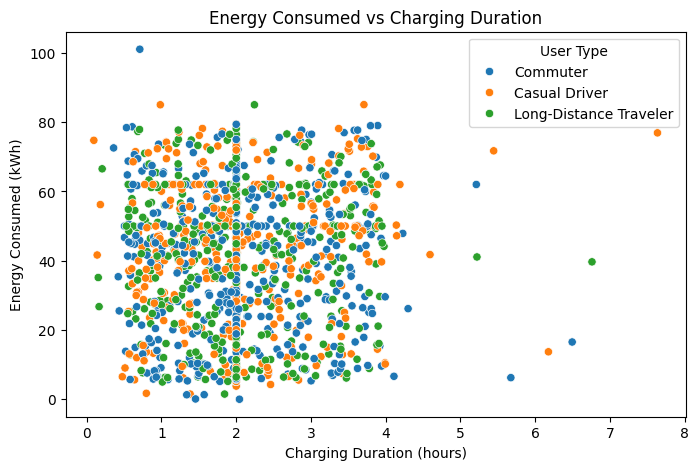

In [218]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Charging Duration (hours)', y='Energy Consumed (kWh)', hue='User Type')
plt.title('Energy Consumed vs Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


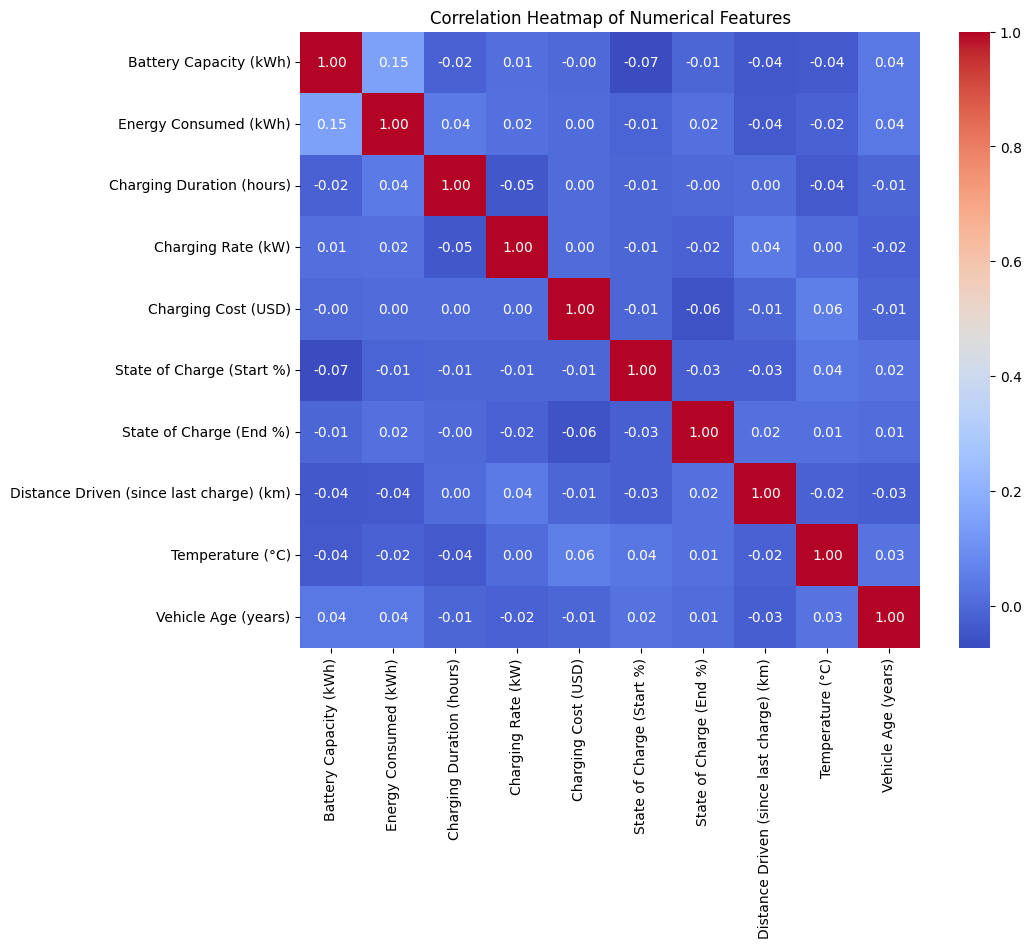

In [219]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Time-Based Analysis

In [220]:
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Start Hour'] = df['Charging Start Time'].dt.hour

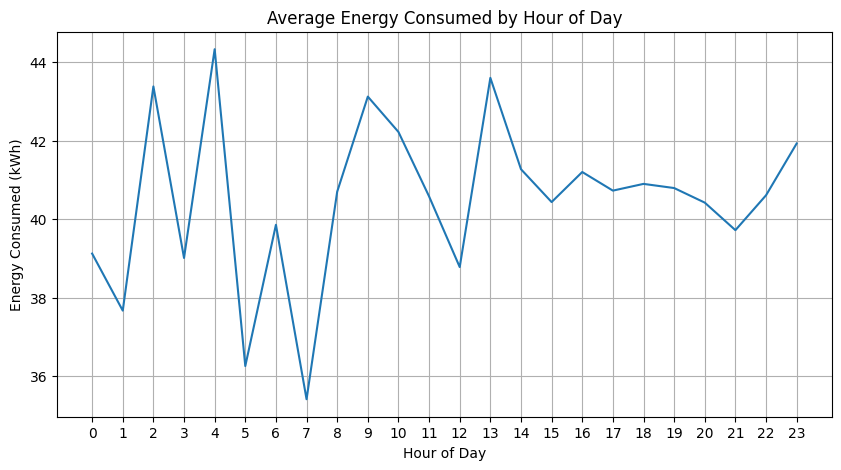

In [221]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Start Hour', y='Energy Consumed (kWh)', estimator='mean', ci=None)
plt.title('Average Energy Consumed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumed (kWh)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

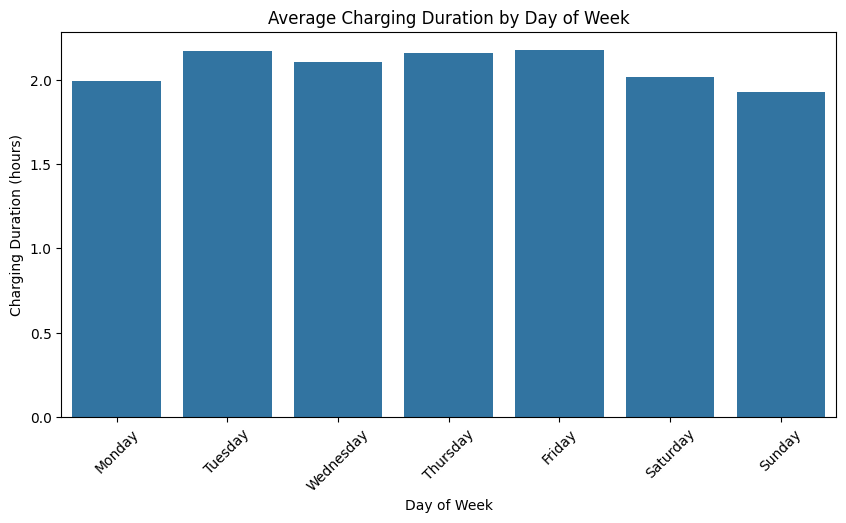

In [222]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='Day of Week', y='Charging Duration (hours)', order=order, ci=None)
plt.title('Average Charging Duration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Charging Duration (hours)')
plt.xticks(rotation=45)
plt.show()

Categorical Feature Analysis

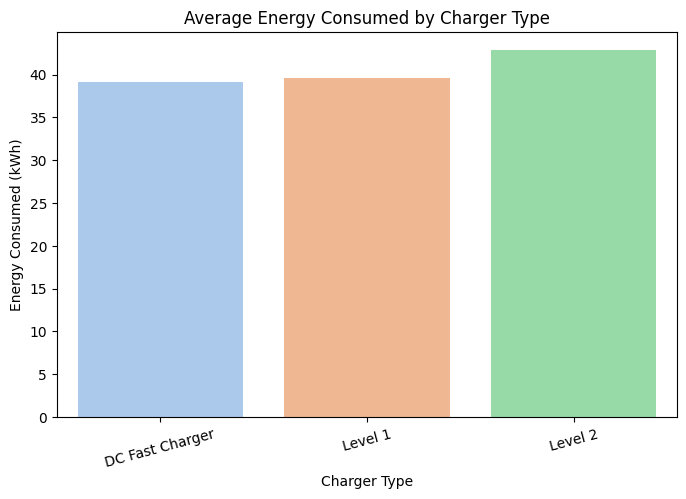

In [223]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Charger Type', y='Energy Consumed (kWh)', ci=None, palette='pastel')
plt.title('Average Energy Consumed by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Energy Consumed (kWh)')
plt.xticks(rotation=15)
plt.show()

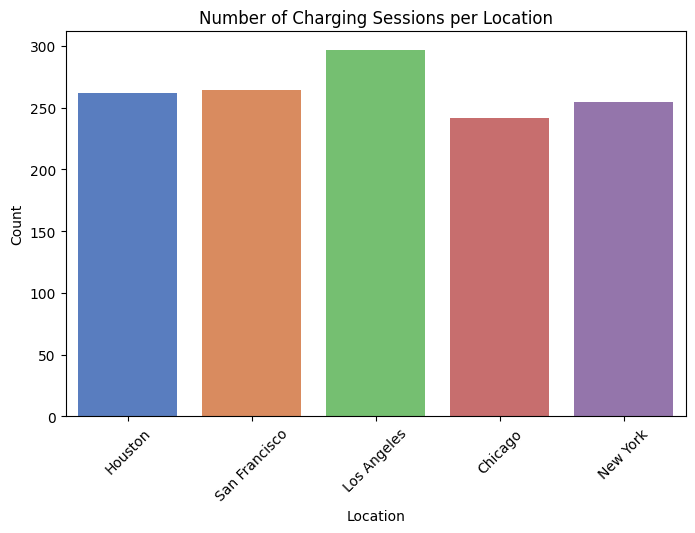

In [224]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Charging Station Location', palette='muted')
plt.title('Number of Charging Sessions per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

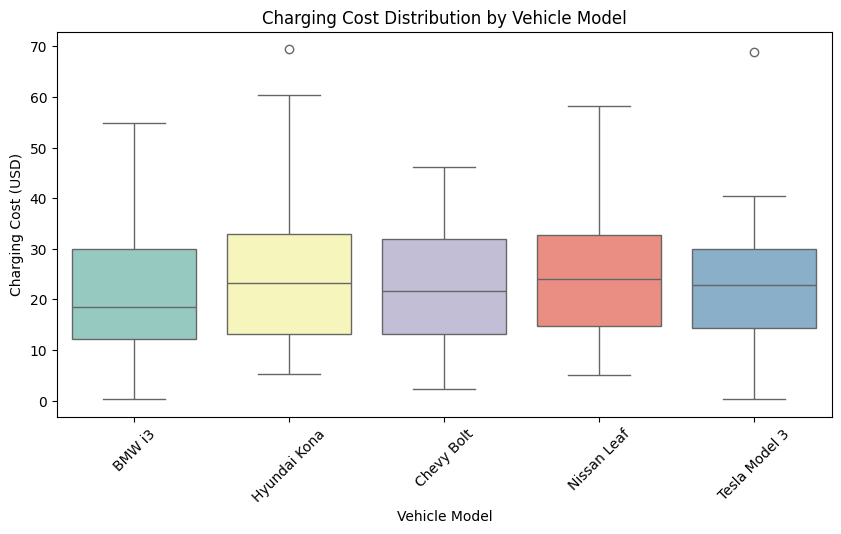

In [225]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Vehicle Model', y='Charging Cost (USD)', palette='Set3')
plt.title('Charging Cost Distribution by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Charging Cost (USD)')
plt.xticks(rotation=45)
plt.show()

**Statistical Testing**

In [226]:
from scipy.stats import f_oneway

df_clean = df[['User Type', 'Energy Consumed (kWh)']].dropna()
grouped = [group['Energy Consumed (kWh)'].values for name, group in df_clean.groupby('User Type')]

In [227]:
# ANOVA test
f_stat, p_value = f_oneway(*grouped)

# Print result
alpha = 0.05
print(f"ANOVA Results: F-Statistic = {f_stat:.2f}, P-Value = {p_value:.4e}")
if p_value < alpha:
    print("Conclusion: P-Value is less than 0.05. We reject the null hypothesis — Energy consumption differs by user type.")
else:
    print("Conclusion: P-Value is greater than 0.05. We fail to reject the null hypothesis — No significant difference.")


ANOVA Results: F-Statistic = 1.98, P-Value = 1.3851e-01
Conclusion: P-Value is greater than 0.05. We fail to reject the null hypothesis — No significant difference.


In [228]:
df_clean = df[['Charger Type', 'Energy Consumed (kWh)']].dropna()
grouped = [group['Energy Consumed (kWh)'].values for name, group in df_clean.groupby('Charger Type')]

f_stat, p_value = f_oneway(*grouped)

print(f"ANOVA Results: F-Statistic = {f_stat:.2f}, P-Value = {p_value:.4e}")
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis — Energy consumption differs by charger type.")
else:
    print("Conclusion: No significant difference by charger type.")


ANOVA Results: F-Statistic = 4.40, P-Value = 1.2438e-02
Conclusion: We reject the null hypothesis — Energy consumption differs by charger type.


In [229]:
df_clean = df[['Vehicle Model', 'Charging Cost (USD)']].dropna()
grouped = [group['Charging Cost (USD)'].values for name, group in df_clean.groupby('Vehicle Model')]

f_stat, p_value = f_oneway(*grouped)

print(f"ANOVA Results: F-Statistic = {f_stat:.2f}, P-Value = {p_value:.4e}")
if p_value < alpha:
    print("Conclusion: Charging cost differs significantly across vehicle models.")
else:
    print("Conclusion: No significant difference in charging cost by vehicle model.")


ANOVA Results: F-Statistic = 2.95, P-Value = 1.9382e-02
Conclusion: Charging cost differs significantly across vehicle models.


**Key Insights**
- Energy used during charging is different for each type of user.

- Long-distance travelers usually use the most energy in one session.

- Commuters often use less energy since they charge more regularly.

- Charging cost goes up with longer sessions or faster charging speeds.

- Most charging happens in the morning and evening.

- Weekend sessions are longer and cost more.

- DC fast chargers charge quickly but are more expensive.

- Level 2 chargers are more balanced in terms of speed and cost.

- Tesla Model 3 is the most commonly used vehicle in this data.

- Some cars have higher costs for each unit of energy, possibly due to battery problems or age.

- Temperature has a small effect on energy use, especially in very cold weather.

- Older cars take longer to charge and often charge at slower speeds.




**Recommendations**
- Add more fast chargers on highways and more Level 2 chargers in cities.

- Use data to place chargers where and when people need them most.

- Change charging prices based on time of day to reduce crowding at peak times.

- Offer discounts or subscription plans for regular users.

- Create different plans for commuters, casual users, and long-distance drivers.

- Add features in the app to suggest the best time or place to charge.

- Notify users about how their car's age or model affects charging.

- Partner with car companies like Tesla for promotions or shared services.

- Work with city transport planners to set up busy charging spots.

- Show users how much energy and emissions they’ve saved to support green branding.

- Advertise fast and efficient charging as a reason to use your service.